# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [9]:
from keras.utils import np_utils
import numpy as np
# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
np.random.seed(10)

In [10]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label)= mnist.load_data()

In [11]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [12]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [13]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
#建立模型
#宣告採用序列模型
model = Sequential()

W0707 22:50:29.744866 13524 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [16]:
#建構Llayer
model.add(Dense(units=256, input_dim=28*28,  kernel_initializer='normal',  activation='relu'))
model.add(Dense(units=128, input_dim=28*28, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=64, input_dim=28*28, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=32, input_dim=28*28, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

W0707 22:50:29.823998 13524 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 22:50:29.830481 13524 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



# 訓練模型

In [17]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

W0707 22:50:30.177771 13524 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0707 22:50:30.213011 13524 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [18]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

W0707 22:50:30.740848 13524 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0707 22:50:30.866931 13524 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 47s 985us/step - loss: 0.3471 - acc: 0.8942 - val_loss: 0.1601 - val_acc: 0.9531
Epoch 2/10
48000/48000 [==============================] - 37s 773us/step - loss: 0.1263 - acc: 0.9615 - val_loss: 0.1124 - val_acc: 0.9657: 0s - loss: 0.1270 - a
Epoch 3/10
48000/48000 [==============================] - 27s 562us/step - loss: 0.0863 - acc: 0.9742 - val_loss: 0.1174 - val_acc: 0.9668
Epoch 4/10
48000/48000 [==============================] - 29s 612us/step - loss: 0.0638 - acc: 0.9800 - val_loss: 0.0996 - val_acc: 0.9722
Epoch 5/10
48000/48000 [==============================] - 30s 628us/step - loss: 0.0505 - acc: 0.9839 - val_loss: 0.1091 - val_acc: 0.9698
Epoch 6/10
48000/48000 [==============================] - 29s 595us/step - loss: 0.0416 - acc: 0.9871 - val_loss: 0.1028 - val_acc: 0.9718
Epoch 7/10
48000/48000 [==============================] - 27s 565us/step - loss: 0.0365 - acc

# 以圖形顯示訓練過程

In [19]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

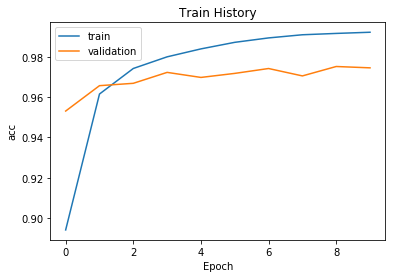

In [20]:
show_train_history(train_history,'acc','val_acc')

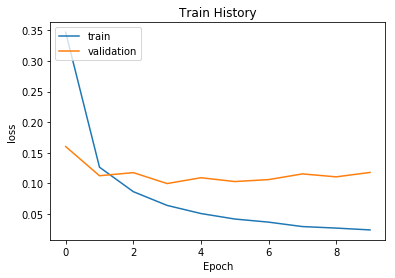

In [21]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [22]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 104us/step
accuracy= 0.9778
